In [51]:
from nn import nn
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [52]:
x = load_digits()['data']
y = load_digits()['target']

In [53]:
x.shape

(1797, 64)

In [54]:
y.shape

(1797,)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1)




In [56]:
seed = 0
epochs = 50
loss_function = 'mse'

In [57]:
arch = [{'input_dim': 64, 'output_dim': 16, 'activation': ''}, {'input_dim': 16, 'output_dim': 64, 'activation': ''}]

lrs = [0.01, 0.001, 0.0001]
acts = [['sigmoid', 'sigmoid'],
       ['relu', 'relu'],
       ['sigmoid', 'relu'],
       ['relu', 'sigmoid'],
      ]
batch_sizes = [12, 128, 256, 512]


# We will run a hyper parameter search over the batchsize, lr, and activation function options to find the params which leads the lowest validation loss

In [65]:
hyperparms_train = {}
hyperparms_val = {}
mses = {}

for lr in lrs:
    for batch_size in batch_sizes:
        for act in acts:
            arch[0]['activation'] = act[0]
            arch[1]['activation'] = act[1]
            mynn = nn.NeuralNetwork(nn_arch = arch, 
                               lr = lr, 
                               seed = seed, 
                               batch_size=batch_size, 
                               epochs=epochs, 
                               loss_function=loss_function)
            train_l, val_l = mynn.fit(X_train, X_train, X_test, X_test)
            mse = mynn.predict(X_test)
            params = f'{lr}_{batch_size}_{act[0]}+{act[1]}'
            mses[params] = mse
            hyperparms_train[params] = train_l
            hyperparms_val[params] = val_l
        

In [72]:
min_val = {}
curr_min = 100000
curr_min_params = ''
for k,v in hyperparms_val.items():
    val = np.min(v)
    min_val[k] = val
    if val < curr_min:
        curr_min = val
        curr_min_params=k

lr, batch_size, arch = curr_min_params.split('_')
l1, l2 = arch.split('+')

print(f"Best hyper params to use is: lr: {lr}, batch_size: {batch_size}, l1 activation: {l1}, l2 activation: {l2}")
print('This results in a validation loss of: ', curr_min)
print('This model has an MSE of: ', np.mean(mses[curr_min_params][-1]))
      
      

Best hyper params to use is: lr: 0.001, batch_size: 12, l1 activation: sigmoid, l2 activation: relu
This results in a validation loss of:  7.6689770542703695
This model has an MSE of:  0.6723776284742977


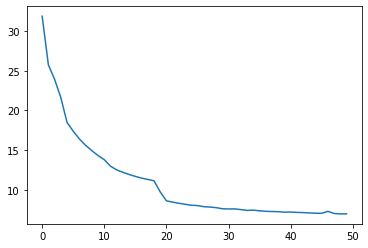

In [73]:
plt.plot(range(epochs),hyperparms_train[curr_min_params])

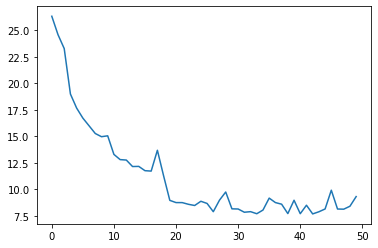

In [74]:
plt.plot(range(epochs),hyperparms_val[curr_min_params])

We can see that we're definitely overfitting after around 40 epochs. To solve this, we should include early stopping.